In [6]:
# Import necessary libraries for the analysis

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in data

df = pd.read_csv(r'C:\AXELS CAMPUS\vgsales.csv')

In [7]:
# Show the data

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
# Check for missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Rank - 0.0%
Name - 0.0%
Platform - 0.0%
Year - 2.0%
Genre - 0.0%
Publisher - 0.0%
NA_Sales - 0.0%
EU_Sales - 0.0%
JP_Sales - 0.0%
Other_Sales - 0.0%
Global_Sales - 0.0%


In [13]:
# Drop rows with missing years

df = df.dropna()

In [15]:
# Check data types

print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [17]:
# Drop duplicates

df.drop_duplicates()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


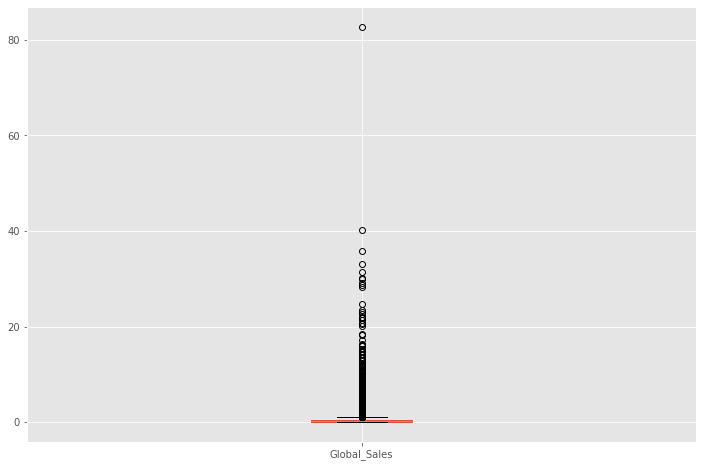

In [18]:
# Outliers

df.boxplot(column=['Global_Sales'])

In [20]:
# Data overview ordered by Global_Sales

df.sort_values(by=['Global_Sales'], inplace=False, ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16183,16186,Sakura-Sou no Pet na Kanojo,PSP,2013.0,Adventure,Kadokawa Games,0.00,0.00,0.01,0.00,0.01
16184,16187,Fatal Fury: Battle Archives Volume 2 (JP sales),PS2,2007.0,Fighting,SNK Playmore,0.00,0.00,0.01,0.00,0.01
16185,16188,Tantei Jinguuji Saburo: Hai to Diamond,PSP,2009.0,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [27]:
# Factorize the data to see correlations between different data types

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.878510,0.146451,-0.044706,0.142465,0.428615,-0.208696,-0.347967,-0.185610,-0.003388,0.663231
Name,0.878510,1.000000,0.053893,-0.050893,0.166887,0.473196,-0.227025,-0.350755,-0.129151,-0.035877,0.572738
Platform,0.146451,0.053893,1.000000,0.314810,0.058114,0.088489,-0.091067,0.028686,0.004395,-0.048552,0.104217
Year,-0.044706,-0.050893,0.314810,1.000000,-0.012196,0.013581,-0.033790,0.104938,0.071224,-0.026914,-0.031988
Genre,0.142465,0.166887,0.058114,-0.012196,1.000000,0.141455,-0.083789,-0.040561,-0.015241,-0.026336,0.080651
Publisher,0.428615,0.473196,0.088489,0.013581,0.141455,1.000000,-0.168562,-0.178557,-0.042837,-0.071022,0.231345
NA_Sales,-0.208696,-0.227025,-0.091067,-0.033790,-0.083789,-0.168562,1.000000,0.230021,-0.104262,0.237914,0.122409
EU_Sales,-0.347967,-0.350755,0.028686,0.104938,-0.040561,-0.178557,0.230021,1.000000,-0.050984,0.253997,-0.018865
JP_Sales,-0.185610,-0.129151,0.004395,0.071224,-0.015241,-0.042837,-0.104262,-0.050984,1.000000,-0.039168,-0.135138
Other_Sales,-0.003388,-0.035877,-0.048552,-0.026914,-0.026336,-0.071022,0.237914,0.253997,-0.039168,1.000000,0.339678


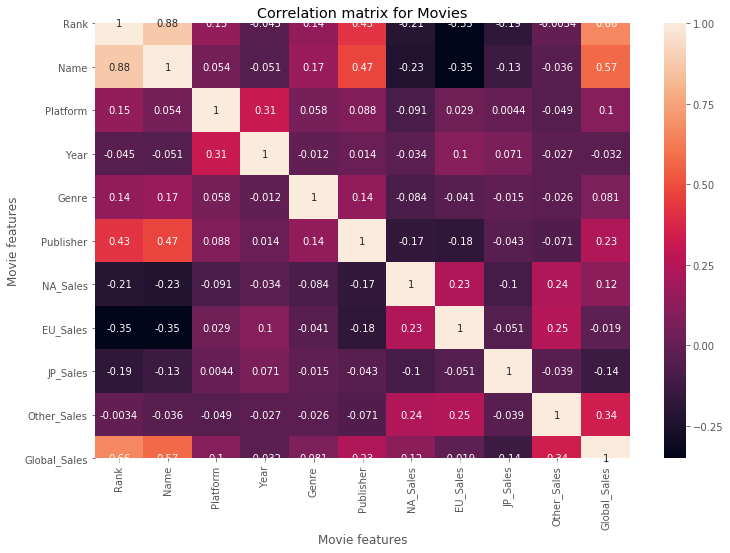

In [32]:
# Correlations between different data types

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [42]:
# Most profitable publishers

CompanyGrossSum = df.groupby(['Publisher'])[["Global_Sales"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['Global_Sales','Publisher'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['Global_Sales'].astype('int64') 

CompanyGrossSumSorted

Publisher
Nintendo                                  1784
Electronic Arts                           1093
Activision                                 721
Sony Computer Entertainment                607
Ubisoft                                    473
Take-Two Interactive                       399
THQ                                        340
Konami Digital Entertainment               278
Sega                                       270
Namco Bandai Games                         253
Microsoft Game Studios                     245
Capcom                                     199
Atari                                      146
Square Enix                                144
Warner Bros. Interactive Entertainment     142
Name: Global_Sales, dtype: int64